<a href="https://colab.research.google.com/github/avnish100/Breast-Cancer-Classification-using-KNN/blob/master/Breast_Cancer_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Breast Cancer Classification Using KNN algorithm

###Importing the Libraries

In [36]:
from sklearn import neighbors,datasets,preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import cross_val_score


In [23]:
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns = data.feature_names)
df.head(10)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
7,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
8,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720
9,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750


In [48]:
breasts = datasets.load_breast_cancer()
x,y = breasts['data'],breasts['target']
X_train,X_test, y_train, y_test = train_test_split(x,y,train_size=0.75,random_state = 33)
knn = neighbors.KNeighborsClassifier(n_neighbors =13)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
y_pred

array([0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0])

In [41]:
accuracy_rate = []

# Range of n_neighbors for KNN
for i in range(1,40):
    knn = neighbors.KNeighborsClassifier(n_neighbors=i)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    accuracy_rate.append(scores.mean())

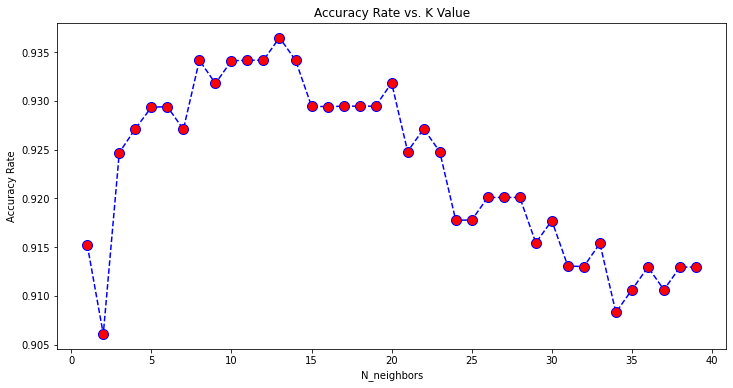

In [42]:
plt.figure(figsize=(12,6))

accuracy_plot = plt.plot(range(1,40), accuracy_rate, color='blue', linestyle='dashed', marker='o', 
    markerfacecolor='red', markersize=10)

accuracy_plot = plt.title('Accuracy Rate vs. K Value')

accuracy_plot = plt.xlabel('N_neighbors')

accuracy_plot = plt.ylabel('Accuracy Rate')

In [46]:
error_rate = []

# Range of n_neighbors for KNN
for i in range(1,50):
    knn = neighbors.KNeighborsClassifier(n_neighbors=i)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    error_rate.append(1 - scores.mean())

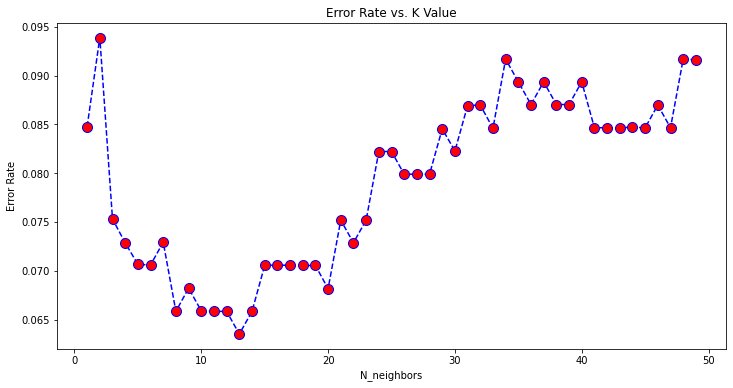

In [47]:
plt.figure(figsize=(12,6))

error_rate_plot = plt.plot(range(1,50), error_rate, color='blue', linestyle='dashed', marker='o', 
    markerfacecolor='red', markersize=10)

error_rate_plot = plt.title('Error Rate vs. K Value')

error_rate_plot = plt.xlabel('N_neighbors')

error_rate_plot = plt.ylabel('Error Rate')

In [49]:
# accuracy_score(y_test, y_pred)
print('Classifier Accuracy: ', accuracy_score(y_test, y_pred)*100)
cf_matrix = confusion_matrix(y_test, y_pred)
label_names = ['True Negative', 'False Positive', 'False Negative', 'True Positive']
cf_counts = ['{0:0.0f}'.format(value) for value in cf_matrix.flatten()]
labels = [f'{v1}\n\n{v2}' for v1, v2 in zip(label_names,cf_counts)]
labels = np.asarray(labels).reshape(2,2)


Classifier Accuracy:  93.00699300699301


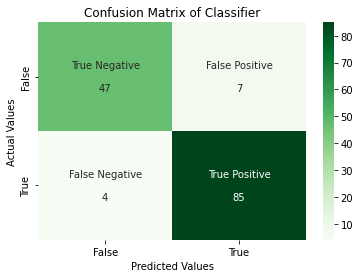

In [44]:
plot = sns.heatmap(cf_matrix, annot = labels, fmt='', cmap = 'Greens')
plot.set_title('Confusion Matrix of Classifier')
plot.set_xlabel("Predicted Values")
plot.set_ylabel('Actual Values')
plot.xaxis.set_ticklabels(['False','True'])
plot.yaxis.set_ticklabels(['False','True'])
plt.show()


In [33]:
classes = ['Bengin', 'Malignant']
print(classification_report(y_test, y_pred, target_names = classes))

              precision    recall  f1-score   support

      Bengin       0.92      0.87      0.90        54
   Malignant       0.92      0.96      0.94        89

    accuracy                           0.92       143
   macro avg       0.92      0.91      0.92       143
weighted avg       0.92      0.92      0.92       143

